In [ ]:
Introduction to Convolutional Neural Network - Assignment

In [ ]:
Problem Statement:
 The task at hand involves classifying images of cats and dogs using a
 Convolutional Neural Network (CNN). We have a dataset containing images of
 cats and dogs and the objective is to train a CNN model to accurately predict the
 class of each image.

 Objectives:
 Data Preparation:
 ● Download and extract the cats vs. dogs dataset.
 ● Organize the dataset into a structured directory format suitable for
 TensorFlow’s ImageDataGenerator.
 ● Split the dataset into training and testing sets.

 Data Augmentation and Preprocessing:
 ● Implement data augmentation techniques to increase the diversity of the
 training dataset, aiding in the model's ability to generalize.
 ● Normalize the pixel values of the images for optimal model performance.

 Model Building:
 ● Construct a Convolutional Neural Network using TensorFlow and Keras.
 ● Themodel should contain multiple convolutional layers, pooling layers, and
 fully connected layers.
     
 Training:
 ● Compile the model and train it on the prepared dataset.
 ● Utilize categorical cross entropy as the loss function and stochastic
 gradient descent as the optimizer.
 ● Train the model for a sufficient number of epochs to achieve good
 performance.
 
 Evaluation:
 ● Evaluate the model's performance on the validation set during training to
 monitor for overfitting.
 ● After training, assess the model's accuracy and make predictions on the
 test set.

 Prediction:
 ● Implement a system to make predictions on new images, categorizing
 them as either cat or dog.
 ● Thesystem should be able to take an image (or a batch of images),
 preprocess it, and pass it through the model for prediction

In [ ]:
# Import reuired libraries

In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import cv2
from tqdm.auto import tqdm
import shutil

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import zipfile

In [7]:
os.getcwd()

'C:\\Users\\acer'

In [ ]:
# Install Kaggle

In [7]:
!pip install kaggle


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# List the contents of the directory to verify that kaggle.json exists
!dir C:\Users\acer\.kaggle


 Volume in drive C is Acer
 Volume Serial Number is 6EA2-1CF1

 Directory of C:\Users\acer\.kaggle

28-02-2025  18:37    <DIR>          .
04-03-2025  15:40    <DIR>          ..
28-02-2025  18:29                70 kaggle.json
               1 File(s)             70 bytes
               2 Dir(s)  377,037,860,864 bytes free


In [ ]:
# File location 

# "C:\Users\acer\Downloads\kaggle.json"

In [13]:
# Path to the kaggle.json file (update this path to the correct location)

kaggle_json_path = "C:/Users/acer/Downloads/kaggle.json"


In [15]:
# Create the .kaggle directory 

os.makedirs("C:/Users/acer/.kaggle", exist_ok=True)

In [17]:
# Move the kaggle.json file to the .kaggle directory
shutil.move(kaggle_json_path, "C:/Users/acer/.kaggle/kaggle.json")

# Import the Kaggle API
import kaggle


In [19]:
kaggle_json_path

'C:/Users/acer/Downloads/kaggle.json'

In [ ]:
# Loading dataset

In [21]:
! kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
# Redownload the dataset
!kaggle competitions download -c dogs-vs-cats --force


  0%|          | 0.00/812M [00:00<?, ?B/s]
  0%|          | 1.00M/812M [00:01<21:03, 673kB/s]
  0%|          | 2.00M/812M [00:02<12:22, 1.14MB/s]
  0%|          | 3.00M/812M [00:02<08:45, 1.62MB/s]
  0%|          | 4.00M/812M [00:02<07:21, 1.92MB/s]
  1%|          | 5.00M/812M [00:03<07:23, 1.91MB/s]
  1%|          | 6.00M/812M [00:03<06:30, 2.17MB/s]
  1%|          | 7.00M/812M [00:04<06:33, 2.14MB/s]
  1%|          | 8.00M/812M [00:04<06:17, 2.23MB/s]
  1%|1         | 9.00M/812M [00:05<06:36, 2.13MB/s]
  1%|1         | 10.0M/812M [00:05<06:23, 2.20MB/s]
  1%|1         | 11.0M/812M [00:05<06:02, 2.32MB/s]
  1%|1         | 12.0M/812M [00:06<05:55, 2.36MB/s]
  2%|1         | 13.0M/812M [00:06<06:27, 2.16MB/s]
  2%|1         | 14.0M/812M [00:07<07:22, 1.89MB/s]
  2%|1         | 15.0M/812M [00:08<07:11, 1.94MB/s]
  2%|1         | 16.0M/812M [00:09<08:42, 1.60MB/s]
  2%|2         | 17.0M/812M [00:09<08:21, 1.66MB/s]
  2%|2         | 18.0M/812M [00:10<07:43, 1.80MB/s]
  2%|2         | 19.0

In [39]:
import zipfile

# Define paths
zip_path = "C:/Users/acer/dogs-vs-cats.zip"
train_zip_path = "C:/Users/acer/dogs-vs-cats/train.zip"
extract_dir = "C:/Users/acer/dogs-vs-cats"

# Unzip the main dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Unzip the train.zip file
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall(os.path.join(extract_dir, "train"))


In [43]:

# Paths
train_zip_path = "C:/Users/acer/dogs-vs-cats/train.zip"
extract_dir = "C:/Users/acer/dogs-vs-cats/train"
dest_cat = "C:/Users/acer/dogs-vs-cats/images/cat/"
dest_dog = "C:/Users/acer/dogs-vs-cats/images/dog/"

# Unzip the train.zip file
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Create directories if they do not exist
os.makedirs(dest_cat, exist_ok=True)
os.makedirs(dest_dog, exist_ok=True)

# Paths to the unzipped directories
source_dir = os.path.join(extract_dir, "train")

# Transfer cat and dog images to their respective directories
for imageName in os.listdir(source_dir):
    if imageName.startswith("cat"):
        shutil.copy(os.path.join(source_dir, imageName), dest_cat)
    elif imageName.startswith("dog"):
        shutil.copy(os.path.join(source_dir, imageName), dest_dog)


In [45]:
from tqdm import tqdm
import time

for i in tqdm(range(100)):
    time.sleep(0.1)


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.36it/s]


In [ ]:
# Data Augmentation and Preprocessing

In [65]:
# Data augmentation and preprocessing
idg = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=30,
    rescale=1/255.0,
    validation_split=0.1
)

batch_size = 64

# Create training and validation generators
train_idg = idg.flow_from_directory(
    "C:/Users/acer/dogs-vs-cats/images",
    target_size=(150, 150),
    batch_size=batch_size,
    subset="training",
    class_mode='binary'  
)

val_idg = idg.flow_from_directory(
    "C:/Users/acer/dogs-vs-cats/images",
    target_size=(150, 150),
    batch_size=batch_size,
    subset="validation",
    class_mode='binary'  
)


Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [67]:

# Paths
images_dir = "C:/Users/acer/dogs-vs-cats/images"
cat_dir = os.path.join(images_dir, "cat")
dog_dir = os.path.join(images_dir, "dog")

# Remove unnecessary directories if they exist
unnecessary_dirs = ["cats", "dogs"]
for directory in unnecessary_dirs:
    dir_path = os.path.join(images_dir, directory)
    if os.path.exists(dir_path):
        shutil.rmtree(dir_path)

# Verify the contents of the images folder
print("Contents of the 'images' folder after cleanup:", os.listdir(images_dir))


Contents of the 'images' folder after cleanup: ['cat', 'dog']


In [ ]:
# Model building using TensorFlow and Keras

In [69]:
# Create the CNN model

model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid') ])


In [71]:
# Compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [73]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [102]:
# Train the model

history = model.fit(
    train_idg,
    validation_data=val_idg,
    epochs= 5 )



Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 698s 2s/step - accuracy: 0.7711 - loss: 0.4826 - val_accuracy: 0.7872 - val_loss: 0.4660
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 669s 2s/step - accuracy: 0.8062 - loss: 0.4265 - val_accuracy: 0.8132 - val_loss: 0.4161
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 440s 1s/step - accuracy: 0.8147 - loss: 0.3983 - val_accuracy: 0.8304 - val_loss: 0.3715
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 395s 1s/step - accuracy: 0.8311 - loss: 0.3727 - val_accuracy: 0.8336 - val_loss: 0.3624
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 432s 1s/step - accuracy: 0.8441 - loss: 0.3484 - val_accuracy: 0.8360 - val_loss: 0.3528


In [ ]:
# Model Evaluation 

In [104]:
# Evaluate the model
test_loss, test_acc = model.evaluate(val_idg)
print(f"Validation Accuracy: {test_acc:.2f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 769ms/step - accuracy: 0.8525 - loss: 0.3370
Validation Accuracy: 0.85


In [106]:
# Evaluate the model
train_loss, train_acc = model.evaluate(train_idg)
print(f"Training Accuracy: {train_acc:.2f}")

352/352 ━━━━━━━━━━━━━━━━━━━━ 240s 681ms/step - accuracy: 0.8584 - loss: 0.3197
Training Accuracy: 0.86


In [110]:
# Path to the test directory
test_dir = "C:/Users/acer/dogs-vs-cats/test"

# List the contents of the test directory
print("Contents of the 'test' directory:", os.listdir(test_dir))


Contents of the 'test' directory: ['cat.10003.jpg', 'cat.10039.jpg', 'cat.10061.jpg', 'cat.10075.jpg', 'cat.1009.jpg', 'cat.10133.jpg', 'cat.10159.jpg', 'cat.1016.jpg', 'cat.10162.jpg', 'cat.1020.jpg', 'cat.10243.jpg', 'cat.10281.jpg', 'cat.10284.jpg', 'cat.10299.jpg', 'cat.10330.jpg', 'cat.1034.jpg', 'cat.10353.jpg', 'cat.1039.jpg', 'cat.10396.jpg', 'cat.1040.jpg', 'cat.10401.jpg', 'cat.10404.jpg', 'cat.10433.jpg', 'cat.10449.jpg', 'cat.10450.jpg', 'cat.10453.jpg', 'cat.1048.jpg', 'cat.10493.jpg', 'cat.10495.jpg', 'cat.105.jpg', 'cat.10519.jpg', 'cat.10524.jpg', 'cat.10609.jpg', 'cat.10626.jpg', 'cat.10724.jpg', 'cat.10728.jpg', 'cat.10742.jpg', 'cat.10751.jpg', 'cat.10753.jpg', 'cat.10803.jpg', 'cat.10809.jpg', 'cat.10832.jpg', 'cat.10875.jpg', 'cat.10972.jpg', 'cat.10980.jpg', 'cat.11030.jpg', 'cat.11051.jpg', 'cat.11067.jpg', 'cat.11075.jpg', 'cat.1109.jpg', 'cat.11105.jpg', 'cat.11158.jpg', 'cat.11163.jpg', 'cat.11190.jpg', 'cat.11218.jpg', 'cat.11220.jpg', 'cat.11233.jpg', 'cat.1

In [112]:
len(os.listdir(test_dir))

1001

In [114]:
# List the contents of the test directory
test_images = os.listdir(test_dir)

print(f"Contents of the 'test' directory: {test_images[:10]}") 

Contents of the 'test' directory: ['cat.10003.jpg', 'cat.10039.jpg', 'cat.10061.jpg', 'cat.10075.jpg', 'cat.1009.jpg', 'cat.10133.jpg', 'cat.10159.jpg', 'cat.1016.jpg', 'cat.10162.jpg', 'cat.1020.jpg']


In [116]:
# Use the first available test image

test_image_name = test_images[0]

test_image_path = os.path.join(test_dir, test_image_name)

print(f"Testing with image: {test_image_path}")


Testing with image: C:/Users/acer/dogs-vs-cats/test\cat.10003.jpg


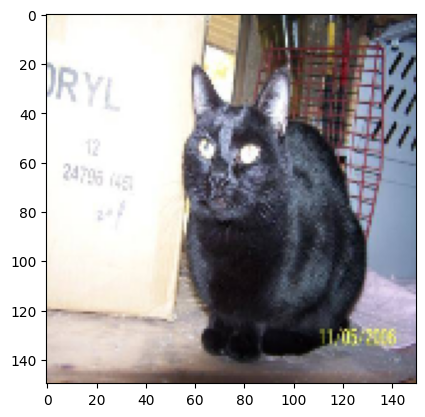

In [118]:
# Load and preprocess the test image

test_image = cv2.imread(test_image_path)

test_image = cv2.resize(test_image, (150, 150))

test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

plt.imshow(test_image)

In [120]:
test_image = np.expand_dims(test_image, axis=0)

test_image = test_image / 255.0

print(f"Test image shape: {test_image.shape}")

Test image shape: (1, 150, 150, 3)


In [ ]:
# Prediction

In [122]:
# Predict the class of the image

prediction = model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [124]:
# Convert the prediction to class label

if prediction[0] > 0.5:
    print("The image is a dog.")
else:
    print("The image is a cat.")

The image is a cat.


In [ ]:
# Using for loop iteration to predict more image from test images

In [ ]:
# Predicting more than one image or set of images

In [126]:

for img_name in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (150, 150))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_array = np.expand_dims(img, axis=0)
    img_array = img_array / 255.0

    # Predict the class of the image
    prediction = model.predict(img_array)

    # Convert the prediction to class label
    if prediction[0] > 0.5:
        print(f"{img_name} is a dog.")
    else:
        print(f"{img_name} is a cat.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
cat.10003.jpg is a cat.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
cat.10039.jpg is a cat.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
cat.10061.jpg is a dog.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
cat.10075.jpg is a cat.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
cat.1009.jpg is a cat.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
cat.10133.jpg is a cat.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
cat.10159.jpg is a dog.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
cat.1016.jpg is a cat.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
cat.10162.jpg is a cat.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
cat.1020.jpg is a dog.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
cat.10243.jpg is a cat.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
cat.10281.jpg is a cat.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
cat.10284.jpg is a cat.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
cat.10299.jpg is a cat.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
cat.10330.jpg is a cat.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
cat.1034.jpg is a cat.
1/1 ━━━━━━

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
# Ploting Accuracy vs epochs and loss vs epochs

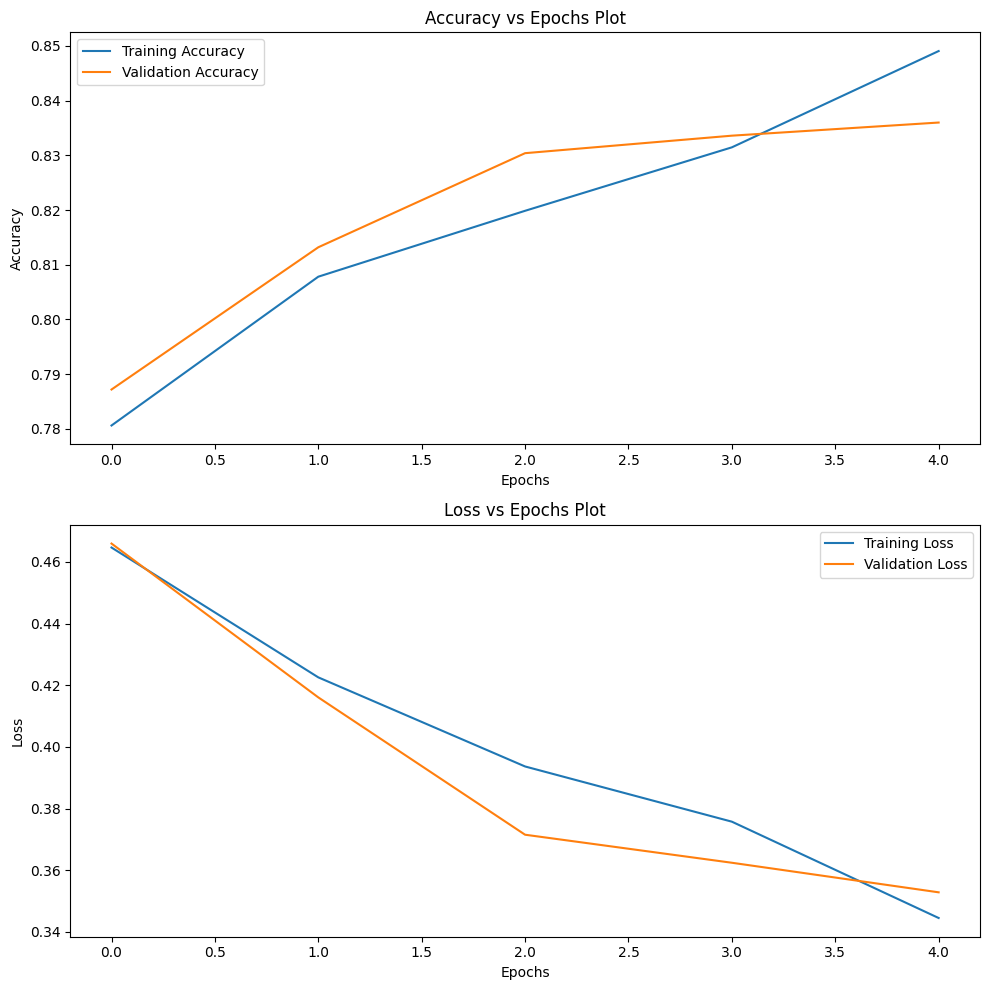

In [128]:
plt.figure(figsize=(10, 10))

# First subplot: Accuracy vs Epochs
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs Plot')

# Second subplot: Loss vs Epochs
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs Plot')

plt.tight_layout()
plt.show()


In [ ]:
# Additional 

In [130]:
# Save the trained model in the native Keras format

model.save("dogs_vs_cats_model.keras")

print("Model saved successfully in the native Keras format!")


Model saved successfully in the native Keras format!


In [132]:
from tensorflow.keras.models import load_model

# Load the saved model in the native Keras format
loaded_model = load_model("dogs_vs_cats_model.keras")
print("Model loaded successfully in the native Keras format!")

# Use the loaded model for predictions
test_image_path = "C:/Users/acer/dogs-vs-cats/test/cat.10003.jpg"  # Update the path as needed
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, (150, 150))
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0
prediction = loaded_model.predict(test_image)
if prediction[0] > 0.5:
    print("The image is a dog.")
else:
    print("The image is a cat.")


Model loaded successfully in the native Keras format!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
The image is a cat.


In [134]:
from tensorflow.keras.models import load_model

# Load the saved model in the native Keras format
loaded_model = load_model("dogs_vs_cats_model.keras")
print("Model loaded successfully in the native Keras format!")

# Use the loaded model for predictions
test_image_path = "C:/Users/acer/dogs-vs-cats/test/cat.10449.jpg"  # Update the path as needed
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, (150, 150))
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0
prediction = loaded_model.predict(test_image)
if prediction[0] > 0.5:
    print("The image is a dog.")
else:
    print("The image is a cat.")


Model loaded successfully in the native Keras format!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
The image is a dog.


In [ ]:
# Make total correct and incorrect predictions 

In [139]:

# Directories to save correct and incorrect predictions
correct_dir = "C:/Users/acer/dogs-vs-cats/predictions/correct/"
incorrect_dir = "C:/Users/acer/dogs-vs-cats/predictions/incorrect/"
os.makedirs(correct_dir, exist_ok=True)
os.makedirs(incorrect_dir, exist_ok=True)

# Paths to the test images directory
test_images_dir = "C:/Users/acer/dogs-vs-cats/test/"

# Initialize counters
correct_count = 0
incorrect_count = 0

# Process and predict each test image
for image_name in os.listdir(test_images_dir):
    test_image_path = os.path.join(test_images_dir, image_name)
    test_image = cv2.imread(test_image_path)
    test_image = cv2.resize(test_image, (150, 150))
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    test_image = np.expand_dims(test_image, axis=0)
    test_image = test_image / 255.0
    prediction = loaded_model.predict(test_image)

    if image_name.startswith("cat"):
        true_label = 0
    elif image_name.startswith("dog"):
        true_label = 1

    if (prediction[0] > 0.5 and true_label == 1) or (prediction[0] <= 0.5 and true_label == 0):
        shutil.copy(test_image_path, correct_dir)
        correct_count += 1
        print(f"The image {image_name} is correctly classified.")
    else:
        shutil.copy(test_image_path, incorrect_dir)
        incorrect_count += 1
        print(f"The image {image_name} is incorrectly classified.")

# Print the total correct and incorrect predictions
print(f"Total Correct Predictions: {correct_count}")
print(f"Total Incorrect Predictions: {incorrect_count}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
The image cat.10003.jpg is correctly classified.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
The image cat.10039.jpg is correctly classified.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
The image cat.10061.jpg is incorrectly classified.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
The image cat.10075.jpg is correctly classified.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
The image cat.1009.jpg is correctly classified.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
The image cat.10133.jpg is correctly classified.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
The image cat.10159.jpg is incorrectly classified.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
The image cat.1016.jpg is correctly classified.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
The image cat.10162.jpg is correctly classified.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
The image cat.1020.jpg is incorrectly classified.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
The image cat.10243.jpg is correctly classified.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
T

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [141]:
print(f"Total Correct Predictions: {correct_count}")
print(f"Total Incorrect Predictions: {incorrect_count}")


Total Correct Predictions: 865
Total Incorrect Predictions: 135
